In [114]:
import os
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
PHASE2_data_dir = r'D:\Projects\superparcels\data\Phase2'
PHASE1_data_dir = r'D:\Projects\superparcels\data\Urban'

In [116]:
alameda_adapt = glob.glob(os.path.join(PHASE2_data_dir,'*alameda*/*Ala*SuperParcels*.shp'))[0]
alameda_fixed = glob.glob(os.path.join(PHASE2_data_dir,'*alameda*/sp_06001_dbscan200-3_rbuff.shp'))[0]

la_adapt = glob.glob(os.path.join(PHASE2_data_dir,'*la_ca*/*LA*SuperParcels*v2.shp'))[0]
la_fixed = glob.glob(os.path.join(PHASE2_data_dir,'*la_ca*/**/**/sp_06037_dbscan200-3_rbuff.shp'))[0]
#la_sample = glob.glob(os.path.join(PHASE2_data_dir,'*la_ca*/*sp_sample*06037*.shp'))[0]

sf_adapt = glob.glob(os.path.join(PHASE2_data_dir,'*san_fran*/*SF*SuperParcels*v2.shp'))[0]
sf_fixed = glob.glob(os.path.join(PHASE2_data_dir,'*san_fran*/sp_06075_dbscan200-3_rbuff.shp'))[0]

In [117]:
alameda_adapt = gpd.read_file(alameda_adapt)
alameda_fixed = gpd.read_file(alameda_fixed)

la_adapt = gpd.read_file(la_adapt)
la_fixed = gpd.read_file(la_fixed)
#la_sample = gpd.read_file(la_sample)

sf_adapt = gpd.read_file(sf_adapt)
sf_fixed = gpd.read_file(sf_fixed)

SuperParcel Area

In [118]:
alameda_fixed['area'] = alameda_fixed.area
la_fixed['area'] = la_fixed.area
sf_fixed['area'] = sf_fixed.area

In [126]:
alameda_fixed.shape

(1218, 5)

In [119]:
# drop area less than 1,000 square meters
alameda_adapt = alameda_adapt[alameda_adapt['area'] > 1000]
alameda_fixed = alameda_fixed[alameda_fixed['area'] > 1000]
la_adapt = la_adapt[la_adapt['area'] > 1000]
la_fixed = la_fixed[la_fixed['area'] > 1000]
sf_adapt = sf_adapt[sf_adapt['area'] > 1000]
sf_fixed = sf_fixed[sf_fixed['area'] > 1000]

In [128]:
# find the range of areas in alameda fixed
alameda_fixed['area'].describe()

count    1.218000e+03
mean     1.191966e+05
std      7.793713e+05
min      1.002638e+03
25%      2.227080e+03
50%      4.036741e+03
75%      1.021030e+04
max      1.618312e+07
Name: area, dtype: float64

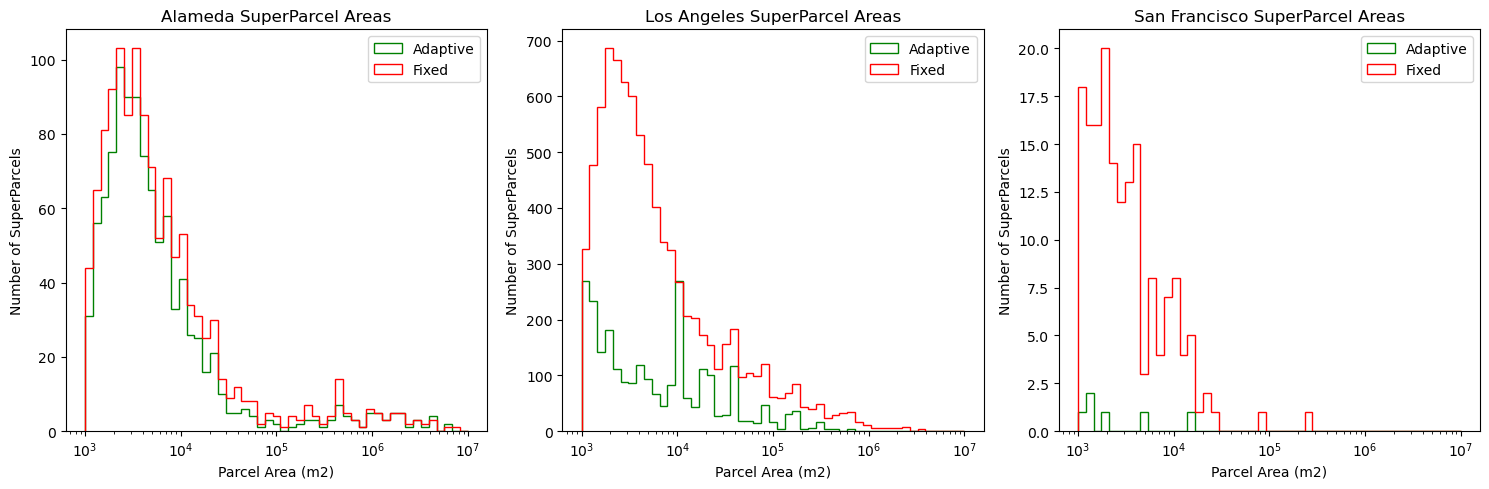

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Create the figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the bin edges for area
area_bins = np.logspace(np.log10(1000), np.log10(10000000), 50)  # Logarithmic bins (adjust the range and number of bins as needed)

# Bar plot for Alameda SuperParcel Areas
axes[0].hist(alameda_adapt['area'], bins=area_bins, histtype='step', alpha=1, edgecolor='green', color='green', label='Adaptive') 
axes[0].hist(alameda_fixed['area'], bins=area_bins, histtype='step', alpha=1, edgecolor='red', color='red', label='Fixed')
axes[0].set_xscale('log')  # Log scale for x-axis
axes[0].set_xlabel('Parcel Area (m2)')
axes[0].set_ylabel('Number of SuperParcels')
axes[0].set_title('Alameda SuperParcel Areas')
axes[0].legend()

# Bar plot for Los Angeles SuperParcel Areas
axes[1].hist(la_adapt['area'], bins=area_bins, histtype='step', alpha=1, edgecolor='green', color='green', label='Adaptive')
axes[1].hist(la_fixed['area'], bins=area_bins, histtype='step', alpha=1, edgecolor='red', color='red', label='Fixed')
axes[1].set_xscale('log')  # Log scale for x-axis
axes[1].set_xlabel('Parcel Area (m2)')
axes[1].set_ylabel('Number of SuperParcels')
axes[1].set_title('Los Angeles SuperParcel Areas')
axes[1].legend()

# Bar plot for San Francisco SuperParcel Areas
axes[2].hist(sf_adapt['area'], bins=area_bins, histtype='step', alpha=1, edgecolor='green', color='green', label='Adaptive')
axes[2].hist(sf_fixed['area'], bins=area_bins, histtype='step', alpha=1, edgecolor='red', color='red', label='Fixed')
axes[2].set_xscale('log')  # Log scale for x-axis
axes[2].set_xlabel('Parcel Area (m2)')
axes[2].set_ylabel('Number of SuperParcels')
axes[2].set_title('San Francisco SuperParcel Areas')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


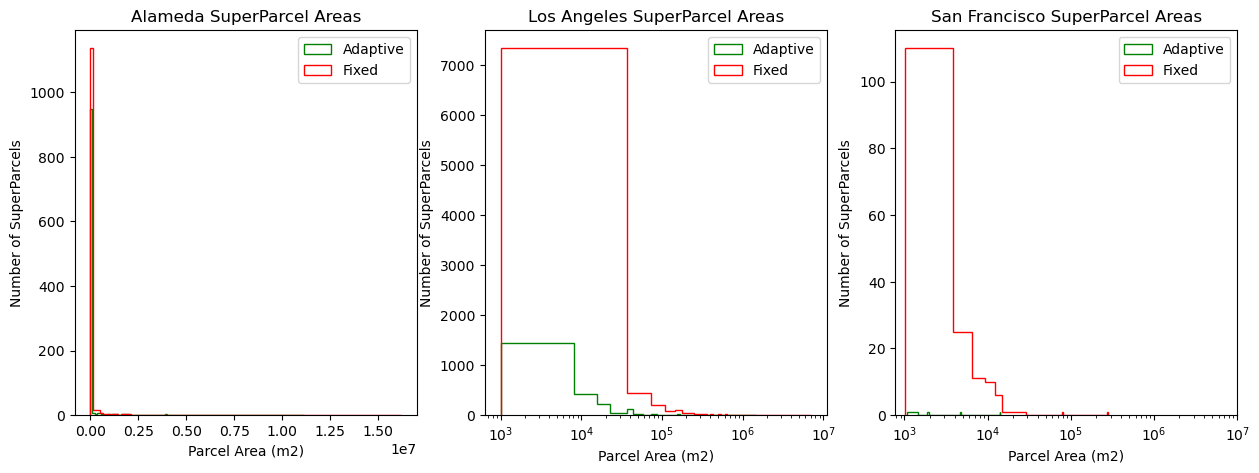

In [ ]:
# create a histogram of parcel area for apapt with y axis log scale
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed
axes[0].hist(alameda_adapt['area'], bins=100, histtype='step', alpha=1, edgecolor='green')  # Replace `df` with your dataframe
axes[0].hist(alameda_fixed['area'], bins=100, histtype='step', alpha=1, edgecolor='red')  # Replace `another_df` with your second dataframe
#axes[0].set_xscale('log')   

#x_ticks = [1000, 10000, 100000, 1000000, 10000000]

#axes[0].set_xticks(x_ticks)
#axes[0].yticks(y_ticks)
axes[0].set_xlabel('Parcel Area (m2)')
axes[0].set_ylabel('Number of SuperParcels')
axes[0].set_title('Alameda SuperParcel Areas')
axes[0].legend(['Adaptive', 'Fixed'])

axes[1].hist(la_adapt['area'], bins=100, histtype='step', alpha=1, edgecolor='green')  # Replace `df` with your dataframe
axes[1].hist(la_fixed['area'], bins=100, histtype='step', alpha=1, edgecolor='red')  # Replace `another_df` with your second dataframe
axes[1].set_xscale('log')
axes[1].set_xticks(x_ticks)
#axes[0].yticks(y_ticks)
axes[1].set_xlabel('Parcel Area (m2)')
axes[1].set_ylabel('Number of SuperParcels')
axes[1].set_title('Los Angeles SuperParcel Areas')
axes[1].legend(['Adaptive', 'Fixed'])

axes[2].hist(sf_adapt['area'], bins=100, histtype='step', alpha=1, edgecolor='green')  # Replace `df` with your dataframe
axes[2].hist(sf_fixed['area'], bins=100, histtype='step', alpha=1, edgecolor='red')  # Replace `another_df` with your second dataframe
axes[2].set_xscale('log')
axes[2].set_xticks(x_ticks)
#axes[0].yticks(y_ticks)
axes[2].set_xlabel('Parcel Area (m2)')
axes[2].set_ylabel('Number of SuperParcels')
axes[2].set_title('San Francisco SuperParcel Areas')
axes[2].legend(['Adaptive', 'Fixed'])

plt.show()

SuperParcel Density

In [121]:
#

In [122]:
la_place_count = la_adapt['place_id'].value_counts()
la_adapt_dense = la_adapt[la_adapt['place_id'].isin(la_place_count[la_place_count > 10].index)]
la_adapt_dense['place_id'].astype(int).unique()

array([ 99,  45,  75,  43,  78,  50, 150, 103,  69, 106, 130, 104,  65,
        29,  32,  68, 121, 149,  27,   9, 152, 126,  22,  14, 138])

In [123]:
alameda_adapt = alameda_adapt.sort_values(by='place_id', ascending=True)
la_adapt_dense = la_adapt_dense.sort_values(by='place_id', ascending=True)
sf_adapt = sf_adapt.sort_values(by='place_id', ascending=True)


In [124]:
alameda_adapt = alameda_adapt.loc[alameda_adapt['knn_dist'] <= 200]
sf_adapt = sf_adapt.loc[sf_adapt['knn_dist'] <= 200]
la_adapt_dense = la_adapt_dense.loc[la_adapt_dense['knn_dist'] <= 200]

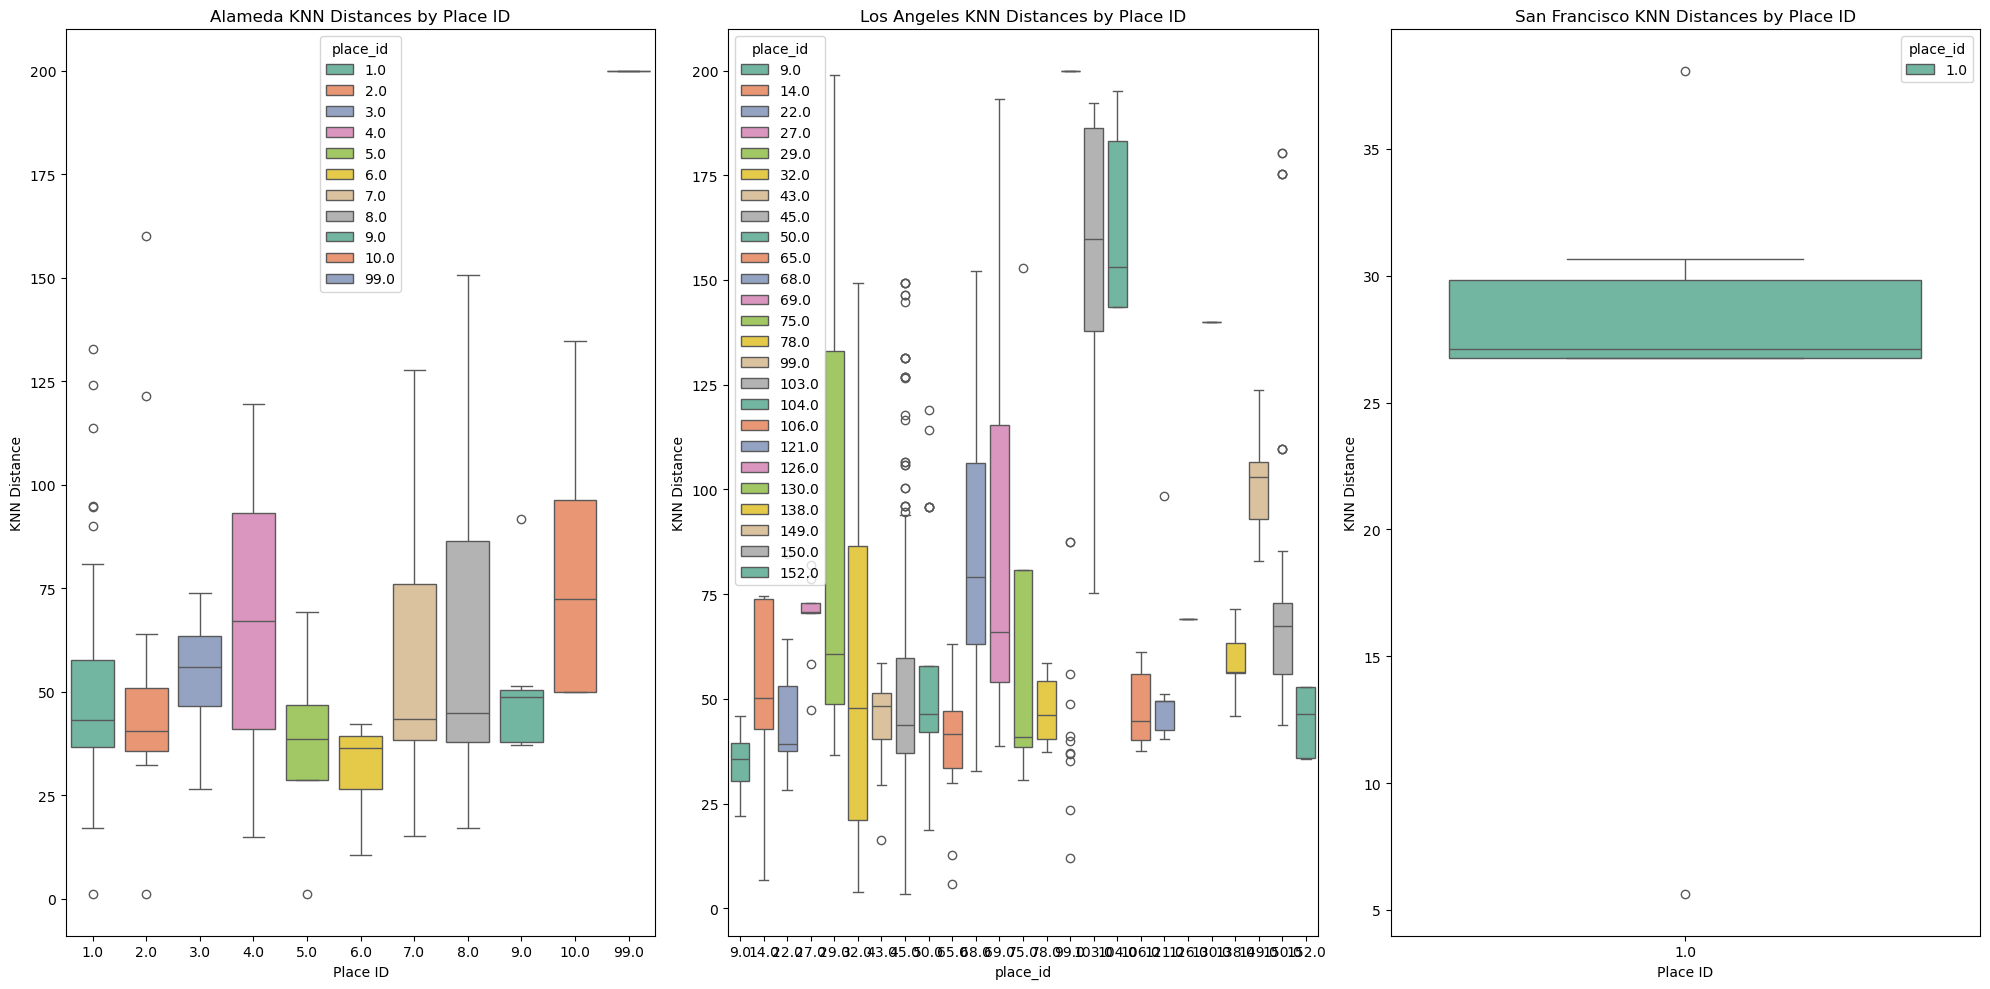

In [125]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))  # Adjust figsize as needed

sns.boxplot(x='place_id', y='knn_dist', data=alameda_adapt, palette='Set2', ax=ax[0], hue='place_id')
ax[0].set_xlabel('Place ID')
ax[0].set_ylabel('KNN Distance')
ax[0].set_title('Alameda KNN Distances by Place ID')
#ax[0].set_xticks(rotation=45, ha='right')

ax[1] = sns.boxplot(x='place_id', y='knn_dist', data=la_adapt_dense, palette='Set2', ax=ax[1], hue='place_id')
#ax[1].set_xlabel('Place ID', labelpad=5)
ax[1].set_ylabel('KNN Distance')
ax[1].set_title('Los Angeles KNN Distances by Place ID')
#ax[1].set_xticks(ticks=la_adapt_dense['place_id'].unique(), font=5)

sns.boxplot(x='place_id', y='knn_dist', data=sf_adapt, palette='Set2', ax=ax[2], hue='place_id')
ax[2].set_xlabel('Place ID')
ax[2].set_ylabel('KNN Distance')
ax[2].set_title('San Francisco KNN Distances by Place ID')
#ax[2].set_xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
